Preprocessing

In [ ]:
#Standardization

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/crops .csv'
dataset = pd.read_csv(file_path)

# Extract features and target
features = dataset[['temperature', 'humidity', 'ph', 'rainfall']]
target = dataset['label']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
standardized_features = scaler.fit_transform(features)

# Create a DataFrame for the standardized data
standardized_dataset = pd.DataFrame(standardized_features, columns=features.columns)
standardized_dataset['label'] = target

# Save the standardized dataset to a CSV file
output_file_path = 'standardized_crops.csv'  # Specify your desired file name
standardized_dataset.to_csv(output_file_path, index=False)


#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Features for PCA (after standardization)
X = standardized_dataset[['temperature', 'humidity', 'ph', 'rainfall']]

# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_dataset = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_dataset['label'] = dataset['label']  # Add the target column

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display explained variance ratio
print(f"Explained Variance Ratio: {explained_variance}")

# Save the PCA-transformed dataset
output_file_path = 'pca_transformed_dataset.csv'
pca_dataset.to_csv(output_file_path, index=False)
print(f"PCA-transformed dataset saved to {output_file_path}")




Explained Variance Ratio: [0.30643842 0.27511056]
PCA-transformed dataset saved to pca_transformed_dataset.csv


Random Forest


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/standardized_crops.csv')
data.head()
data.shape
data.info()

x = data.drop('label', axis=1)
x.head()
y = data['label']
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape
x_test.shape

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)

pred = model.predict(x_test)
pred

y_test

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

data['label'].value_counts()








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB
0.9666666666666667
[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 29  0  0  0  0  0  0  

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


SVM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB
0.8863636363636364
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0 29  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  2 26  0  0  0  0  0  0  

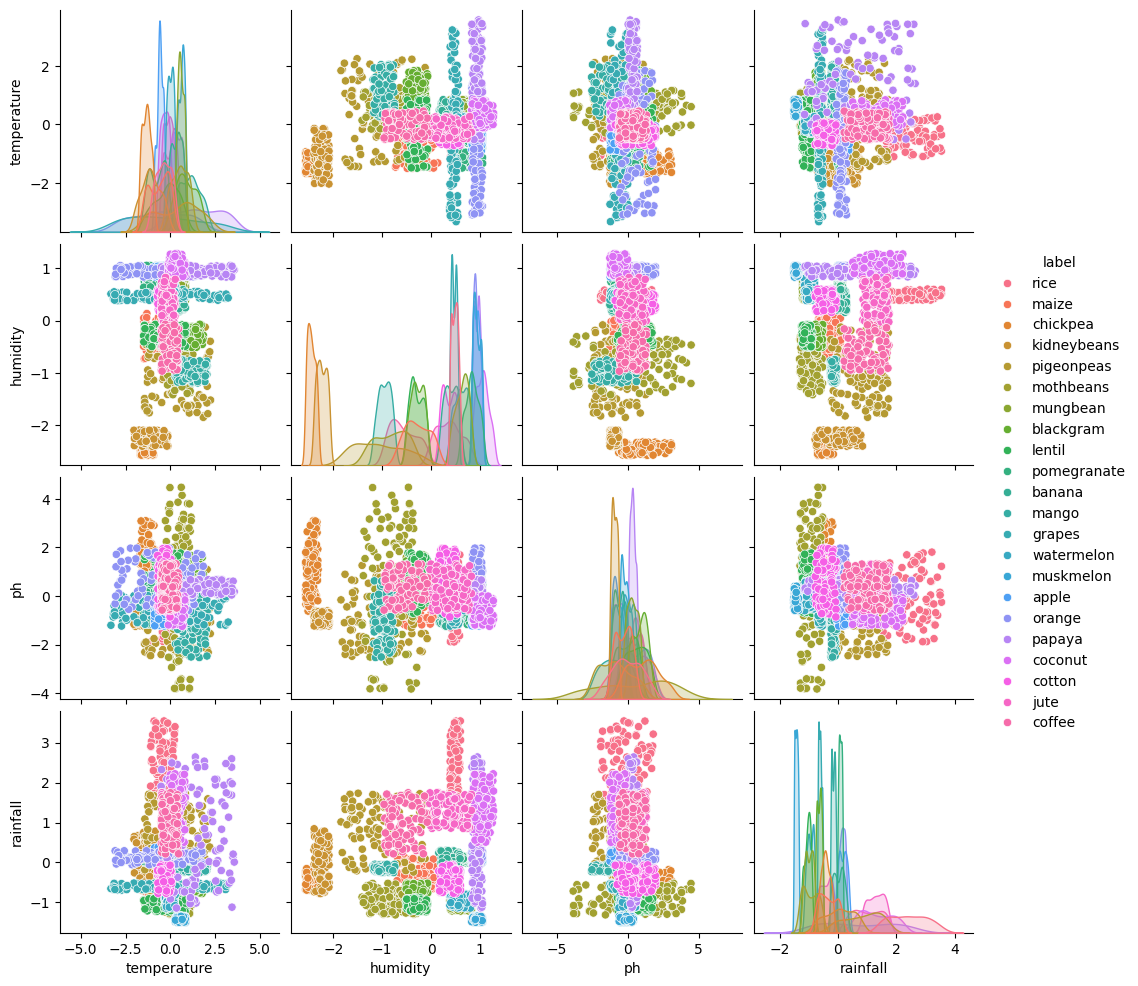

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/standardized_crops.csv')
data.sample(5)

data.info()
data['label'].value_counts()

import seaborn as sns
sns.pairplot(data, hue='label')

x = data.drop('label', axis=1)
x.head()
y = data['label']
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape
x_test.shape

from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

model.kernel

pred = model.predict(x_test)
pred

y_test

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))




K-NN

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/standardized_crops.csv')
data.sample(5)

data.shape
data.info()
data['label'].value_counts()
data.head()

x = data.drop('label', axis=1)
x.head()
y = data['label']
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape
x_test.shape

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

pred = model.predict(x_test)
print(pred[0:5])
print(y_test[0:5])

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB
['orange' 'muskmelon' 'mungbean' 'pigeonpeas' 'mango']
953     pomegranate
1453      muskmelon
638        mungbean
426      pigeonpeas
1130          mango
Name: label, dtype: object
0.8909090909090909
[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  3  0  0]
 [ 0 31  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 

Decision Tree

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/standardized_crops.csv')
data.sample(5)

print(data.shape)
data.info()
print(data['label'].value_counts())
data.head()

x = data.drop('label', axis=1)
x.head()
y = data['label']
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape
x_test.shape

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

print(model.predict(x_test))
print(y_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))


(2200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.1+ KB
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
['blackgram' 'coconut' 'muskmelon' 'mungbean' 'pigeonpeas' 'grapes'
 'cotton' 'rice' 'm